In [0]:
%tensorflow_version 2.x

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
whole_data = load_breast_cancer()

X_data = whole_data.data
y_data = whole_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 7)
print(y_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

[1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0]
(398, 30) (398,) (171, 30) (171,)


In [4]:
model = Sequential()

model.add(Dense(10, input_shape = (30,), activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                310       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [0]:
sgd = optimizers.SGD(lr = 0.01)    # stochastic gradient descent optimizer

model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
history = model.fit(X_train, y_train, batch_size = 50, epochs = 300, validation_split = 0.2, verbose = 0)

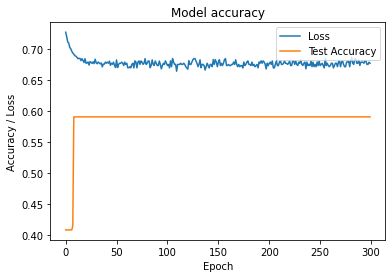

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy / Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Test Accuracy'], loc='upper right')
plt.show()

In [8]:
results = model.evaluate(X_test, y_test)

print('loss: ', results[0])
print('accuracy: ', results[1])

6/6 [==============================] - 0s 3ms/step - loss: 0.6480 - accuracy: 0.6784
loss:  0.6479575037956238
accuracy:  0.6783625483512878


Attempt No 1 - Weight Initialization

In [0]:
model = Sequential()

model.add(Dense(10, input_shape = (30,), activation = 'sigmoid', kernel_initializer = 'he_normal'))
model.add(Dense(10, activation = 'sigmoid', kernel_initializer = 'he_normal'))
model.add(Dense(10, activation = 'sigmoid', kernel_initializer = 'he_normal'))
model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'he_normal'))

sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 50, epochs = 300, validation_split = 0.2, verbose = 0)

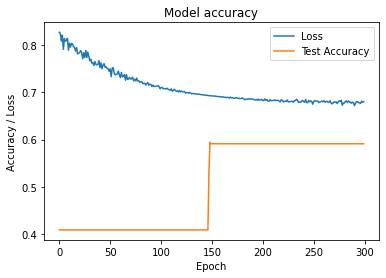

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy / Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Test Accuracy'], loc='upper right')
plt.show()

In [11]:
results = model.evaluate(X_test, y_test)

print('loss: ', results[0])
print('accuracy: ', results[1])

6/6 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.6784
loss:  0.6577876806259155
accuracy:  0.6783625483512878


Attempt No 2 - Batch Normalization


In [0]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()

model.add(Dense(10, input_shape = (30,)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 50, epochs = 300, validation_split = 0.2, verbose = 0)

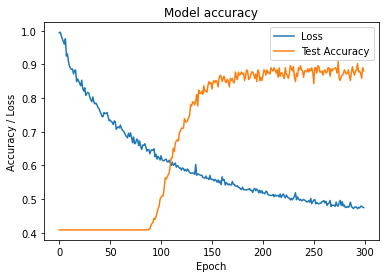

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy / Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Test Accuracy'], loc='upper right')
plt.show()

In [14]:
results = model.evaluate(X_test, y_test)

print('loss: ', results[0])
print('accuracy: ', results[1])

6/6 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.9064
loss:  0.457978218793869
accuracy:  0.9064327478408813


Attempt No 3 - Dropout

In [0]:
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(10, input_shape = (30,)))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 50, epochs = 300, validation_split = 0.2, verbose = 0)

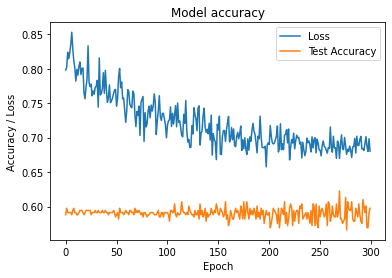

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy / Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Test Accuracy'], loc='upper right')
plt.show()

In [17]:
results = model.evaluate(X_test, y_test)

print('loss: ', results[0])
print('accuracy: ', results[1])

6/6 [==============================] - 0s 2ms/step - loss: 0.6242 - accuracy: 0.6784
loss:  0.6242423057556152
accuracy:  0.6783625483512878


Attempt No 4 - Model Ensemble

In [0]:
import numpy as np
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

def mlp_model():
  model = Sequential()
  model.add(Dense(10, input_shape = (30, )))
  model.add(Dense(10, activation = 'sigmoid'))
  model.add(Dense(10, activation = 'sigmoid'))
  model.add(Dense(1, activation = 'sigmoid'))
  sgd = optimizers.SGD(lr = 0.001)
  model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

model1 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)
model1._estimator_type = "classifier"
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)
model2._estimator_type = "classifier"
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)
model3._estimator_type = "classifier"

In [19]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3)], voting = 'soft')
ensemble_clf.fit(X_train, y_train)
y_pred = ensemble_clf.predict(X_test)

print('Test Accuracy: ', accuracy_score(y_pred, y_test))

Instructions for updating:
Please use `model.predict()` instead.
Test Accuracy:  0.6783625730994152


Improvement Altogether

In [24]:
model = Sequential()
model.add(Dense(50, input_shape = (30, ), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))   
model.add(Dropout(0.2))   
model.add(Dense(50, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))    
model.add(Dropout(0.2))   
model.add(Dense(50, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))    
model.add(Dropout(0.2))  
model.add(Dense(1, kernel_initializer='he_normal'))
model.add(Activation('sigmoid'))

adam = optimizers.Adam(lr = 0.001)  
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(X_train, y_train, batch_size = 50, epochs = 500, validation_split = 0.2, verbose = 0)

In [25]:
results = model.evaluate(X_test, y_test)

print('loss: ', results[0])
print('accuracy: ', results[1])

6/6 [==============================] - 0s 2ms/step - loss: 0.0903 - accuracy: 0.9708
loss:  0.09027671813964844
accuracy:  0.9707602262496948
